# Waze Project
## Course 3 - Go Beyond the Numbers: Translate Data into Insights

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
waze_raw = pd.read_csv('../Raw_data/waze_dataset.csv')
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [6]:
# Dataframe check and familiarization: 
waze_raw.shape

(14999, 13)

In [8]:
#Descriptive statistics
waze_raw.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00


In [9]:
# Dataframe check and familiarization: 
waze_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## Task 3a. Visualizations

<Axes: xlabel='sessions'>

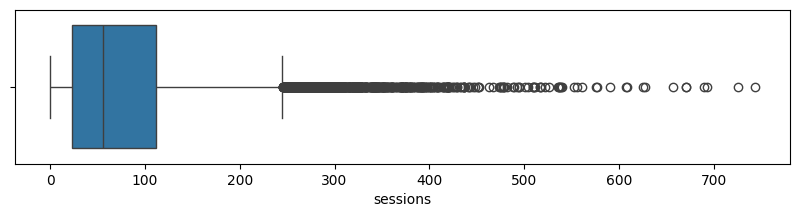

In [10]:
# Box plot
plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x = "sessions"
)

<Axes: xlabel='sessions'>

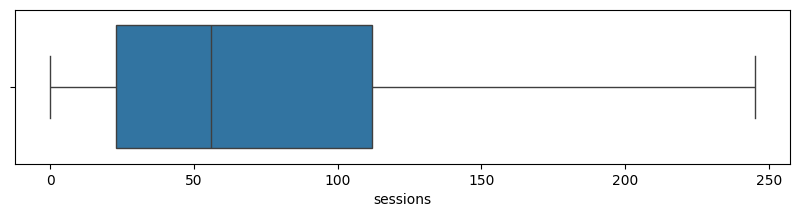

In [11]:
plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x = "sessions",
    showfliers= False
)

<Axes: xlabel='sessions', ylabel='Count'>

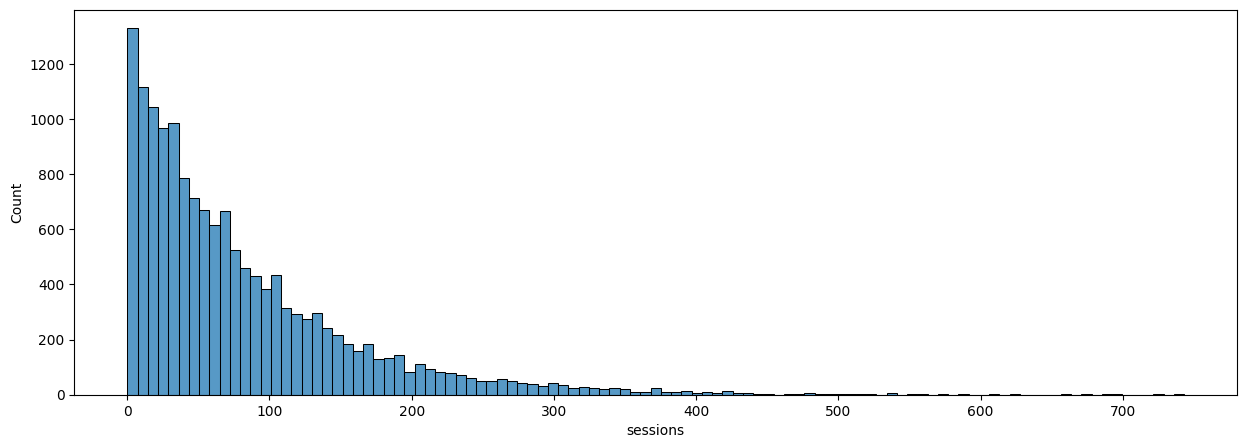

In [12]:
# Histogram

plt.figure( figsize = (15,5))

sns.histplot(
    data= waze_raw,
    x = "sessions"
)

The Median of sessions is: 56.0


Text(61, 3000, 'Median: 56.0')

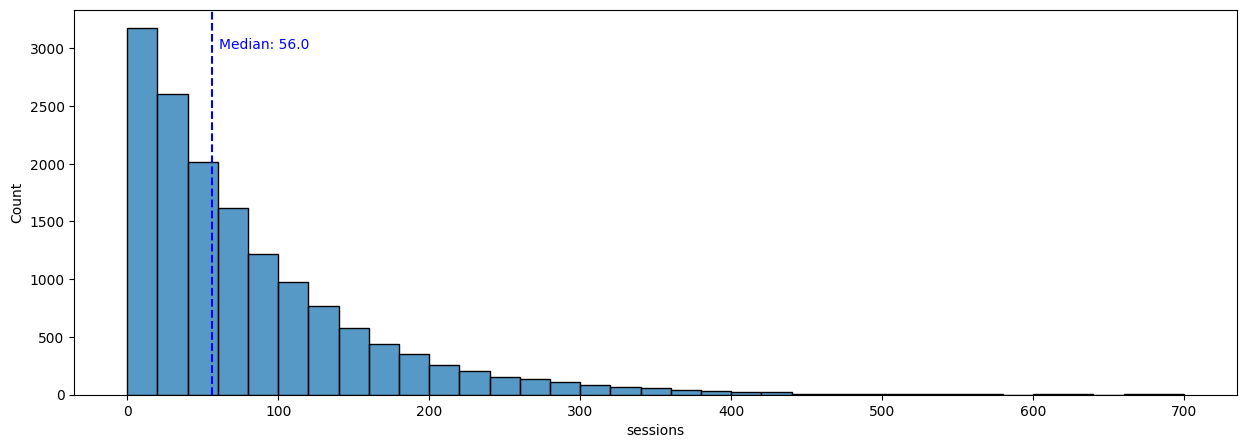

In [13]:
waze_session_median = waze_raw["sessions"].median()
print(f"The Median of sessions is: {waze_session_median}")

plt.figure( figsize = (15,5))

sns.histplot(
    data= waze_raw,
    x = "sessions",
    bins = range(0,701,20)
)

plt.axvline(waze_session_median, color="blue",linestyle = "--")
plt.text(61,3000,f"Median: {waze_session_median}",color="blue")

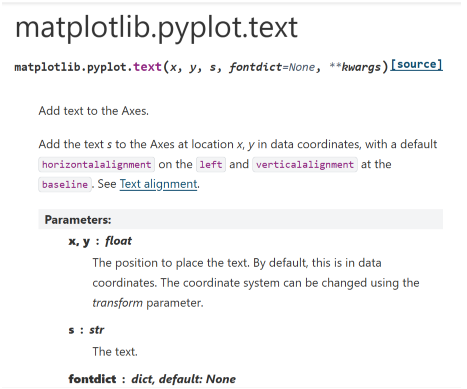

<Axes: xlabel='drives'>

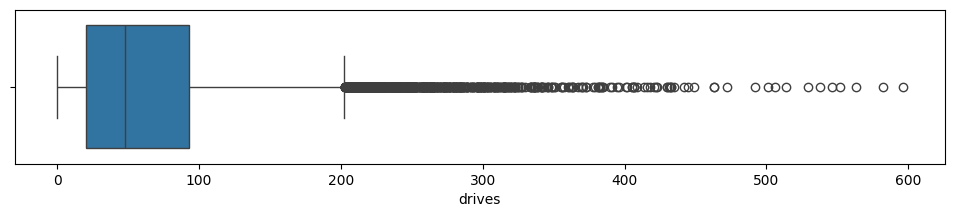

In [14]:
# Box plot

plt.figure(figsize = (12,2))

sns.boxplot(
    data = waze_raw,
    x = "drives"
)

<Axes: xlabel='drives'>

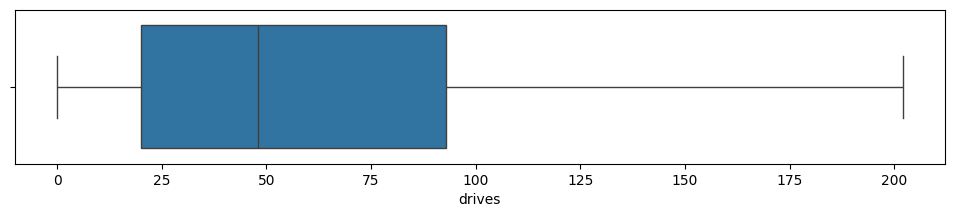

In [15]:
plt.figure(figsize = (12,2))

sns.boxplot(
    data = waze_raw,
    x = "drives",
    showfliers= False
)

<Axes: xlabel='drives', ylabel='Count'>

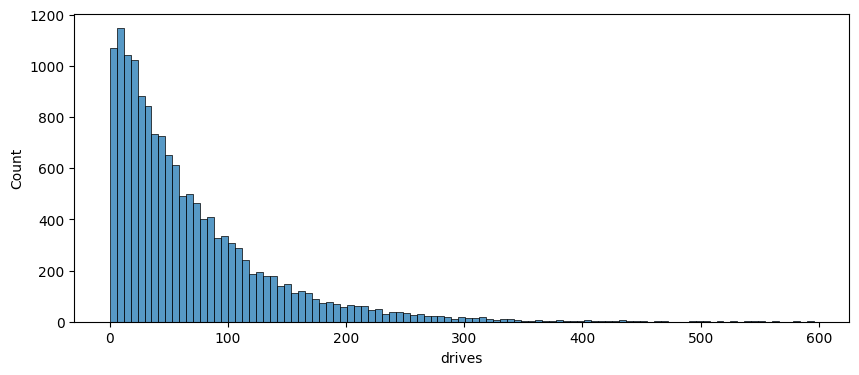

In [16]:
# Histogram
plt.figure(figsize = (10,4))

sns.histplot(
    data = waze_raw,
    x = "drives"
)

Text(50, 3350, 'Drives median: 48.0')

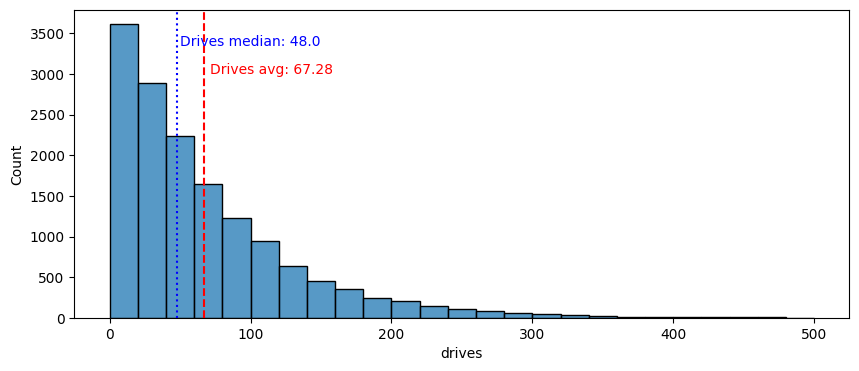

In [17]:
drives_mean = waze_raw["drives"].mean()
drives_median = waze_raw["drives"].median()

plt.figure( figsize = (10,4))

sns.histplot(
    data = waze_raw,
    x = "drives",
    bins = range(0,501,20)
)

plt.axvline(drives_mean, color = "red",linestyle ="--")
plt.axvline(drives_median, color= "blue", linestyle = "dotted")

plt.text(71,3000,f"Drives avg: {drives_mean:.2f}",color="red")
plt.text(50,3350,f"Drives median: {drives_median}",color="blue")

<Axes: xlabel='total_sessions'>

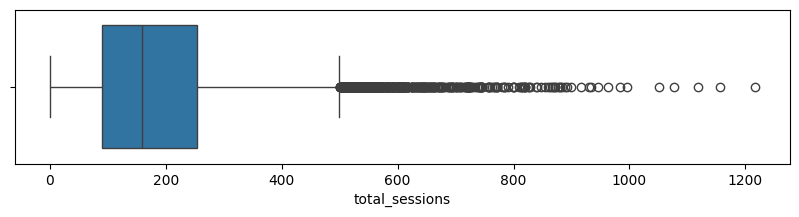

In [18]:
# Box plot

plt.figure(figsize=(10,2))

sns.boxplot(
    data = waze_raw,
    x= "total_sessions"
)

<Axes: xlabel='total_sessions'>

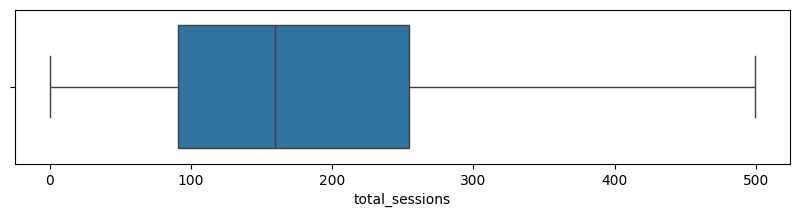

In [19]:
plt.figure(figsize=(10,2))

sns.boxplot(
    data = waze_raw,
    x= "total_sessions",
    showfliers = False
)

<Axes: xlabel='total_sessions', ylabel='Count'>

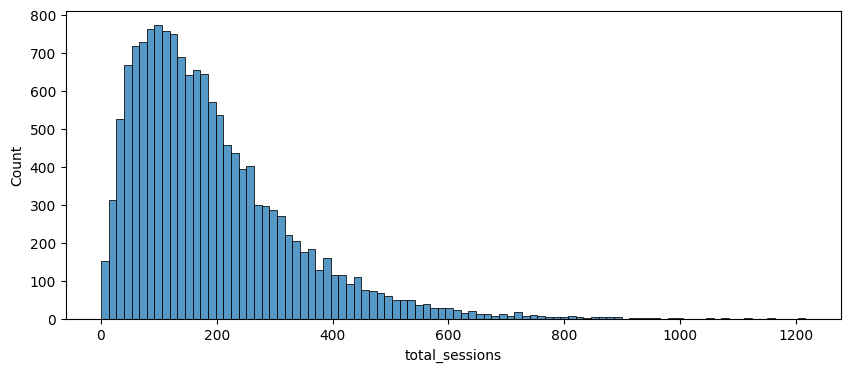

In [20]:
# Histogram

plt.figure( figsize = (10,4))

sns.histplot(
    data = waze_raw,
    x = "total_sessions"
)

Text(163, 1150, 'Total Sessions median: 159.57')

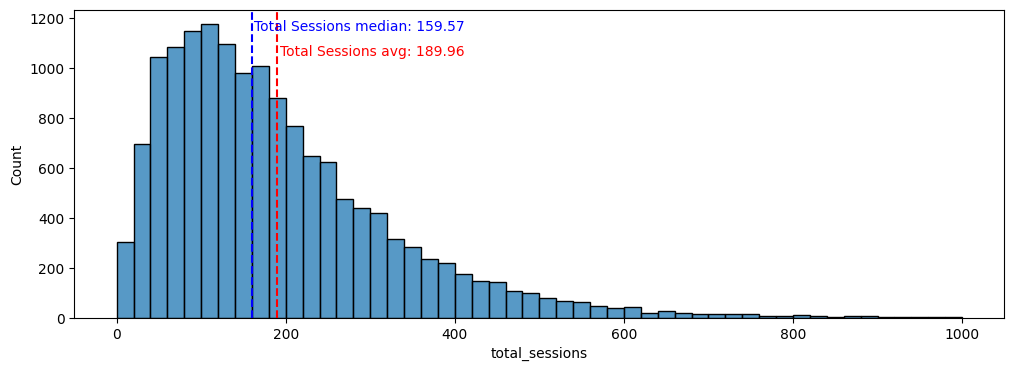

In [21]:
totalsessions_mean = waze_raw["total_sessions"].mean()
totalsessions_median = waze_raw["total_sessions"].median()

plt.figure(figsize = (12,4))

sns.histplot(
    data = waze_raw,
    x = "total_sessions",
    bins = range(0,1001,20)
)

plt.axvline(totalsessions_mean, color="red",linestyle="--")
plt.axvline(totalsessions_median, color="blue",linestyle="--")

plt.text(193,1050,f"Total Sessions avg: {totalsessions_mean:.2f}",color="red")
plt.text(163,1150,f"Total Sessions median: {totalsessions_median:.2f}",color="blue")

<Axes: xlabel='n_days_after_onboarding'>

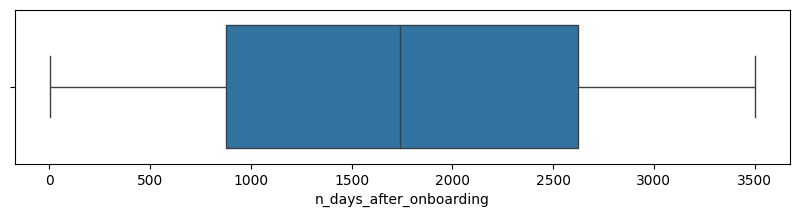

In [22]:
# Box plot

plt.figure(figsize=(10,2))

sns.boxplot(
    data = waze_raw,
    x = "n_days_after_onboarding"
)

<Axes: xlabel='n_days_after_onboarding', ylabel='Count'>

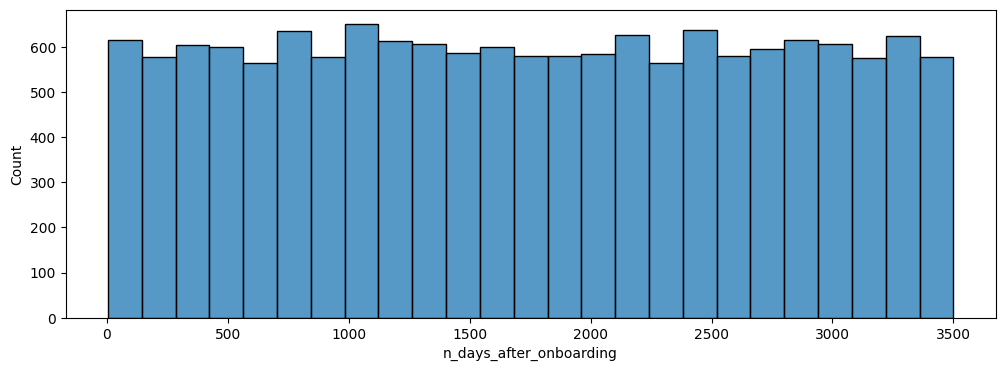

In [23]:
# Histogram
plt.figure(figsize=(12,4))

sns.histplot(
    data = waze_raw,
    x = "n_days_after_onboarding"
)

<Axes: xlabel='driven_km_drives'>

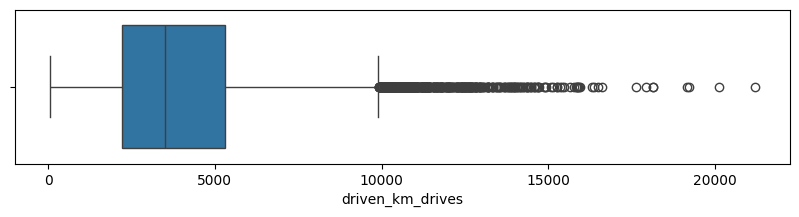

In [24]:
# Box plot
plt.figure(figsize=(10,2))

sns.boxplot(
    data = waze_raw,
    x = "driven_km_drives"
)

<Axes: xlabel='driven_km_drives'>

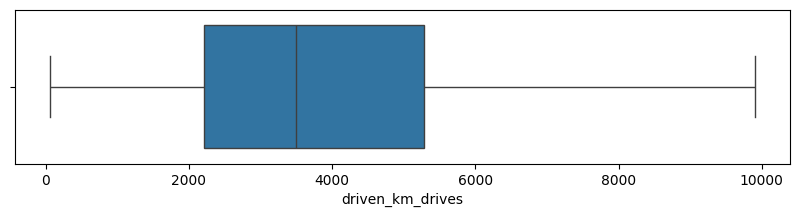

In [25]:
plt.figure(figsize=(10,2))

sns.boxplot(
    data = waze_raw,
    x = "driven_km_drives",
    showfliers = False
)

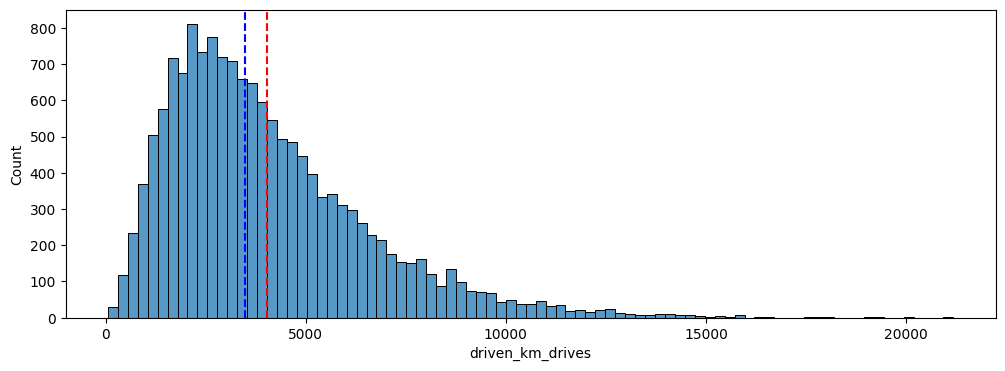

In [26]:
driven_km_mean = waze_raw["driven_km_drives"].mean()
driven_km_median = waze_raw["driven_km_drives"].median()

# Histogram
### YOUR CODE HERE ###

plt.figure(figsize = (12,4))

sns.histplot(
    data= waze_raw,
    x = "driven_km_drives"
)

plt.axvline(driven_km_mean,color="red", linestyle = "--")
plt.axvline(driven_km_median,color="blue",linestyle="--")

<Axes: xlabel='duration_minutes_drives'>

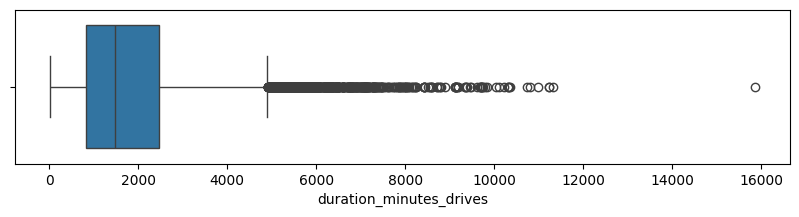

In [27]:
# Box plot

plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x = "duration_minutes_drives"
)

<Axes: xlabel='duration_minutes_drives'>

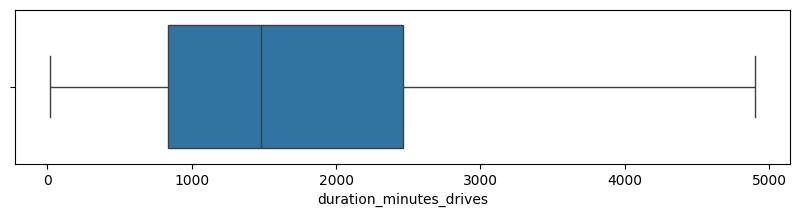

In [28]:
plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x = "duration_minutes_drives",
    showfliers = False
)

<Axes: xlabel='duration_minutes_drives', ylabel='Count'>

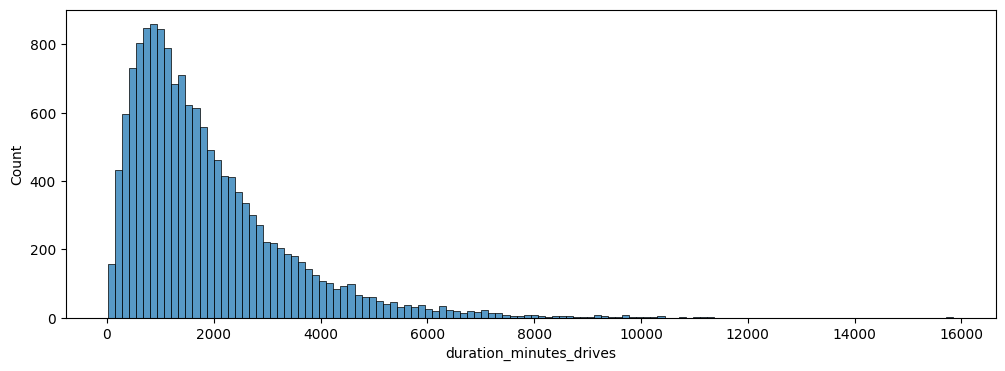

In [29]:
# Histogram

plt.figure(figsize=(12,4))

sns.histplot(
    data = waze_raw,
    x = "duration_minutes_drives"
)

Text(1550, 1250, 'Trip duration median: 1478.25 mins')

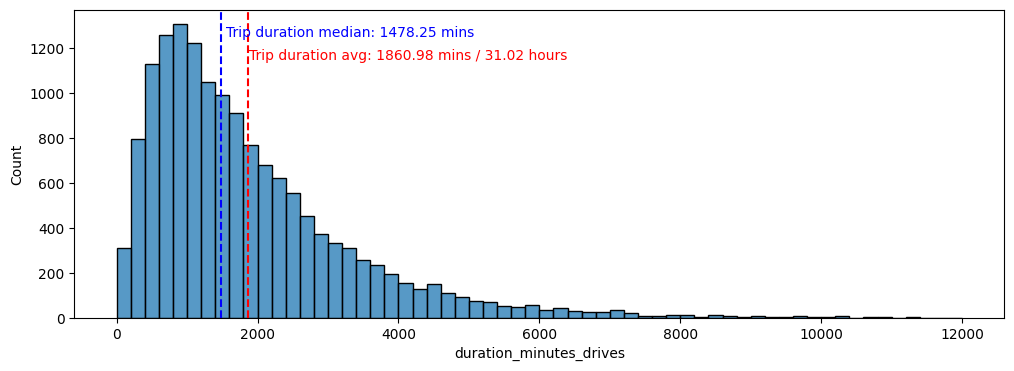

In [30]:
min_duration_mean = waze_raw["duration_minutes_drives"].mean()
min_duration_median = waze_raw["duration_minutes_drives"].median()

plt.figure(figsize=(12,4))

sns.histplot(
    data = waze_raw,
    x = "duration_minutes_drives",
    bins = range(0,12001,200)
)

plt.axvline(min_duration_mean, color = "red",linestyle = "--")
plt.axvline(min_duration_median, color = "blue",linestyle = "--")

plt.text(1875,1150,f"Trip duration avg: {min_duration_mean:.2f} mins / {min_duration_mean/60:.2f} hours",color = "red")
plt.text(1550,1250,f"Trip duration median: {min_duration_median:.2f} mins", color = "blue")

<Axes: xlabel='activity_days'>

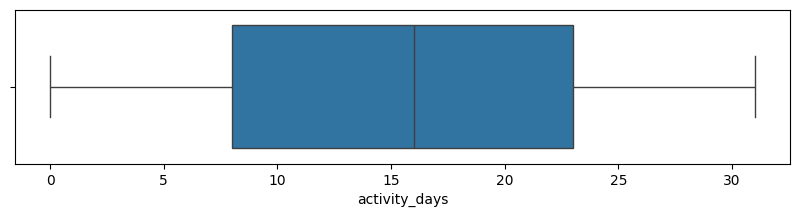

In [31]:
# Box plot

plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x ="activity_days"
)

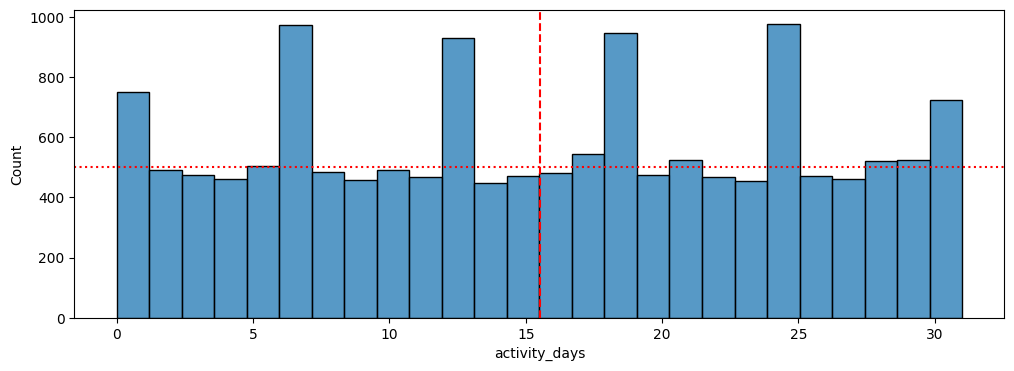

In [32]:
# Histogram

act_days_mean = waze_raw["activity_days"].mean()

plt.figure(figsize=(12,4))

sns.histplot(
    data = waze_raw,
    x = "activity_days"
)

plt.axhline(500,color="red",linestyle="dotted")
plt.axvline(act_days_mean,color ="red",linestyle = "--")

### Driving Days

In [33]:
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [34]:
waze_raw.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00


<Axes: xlabel='activity_days'>

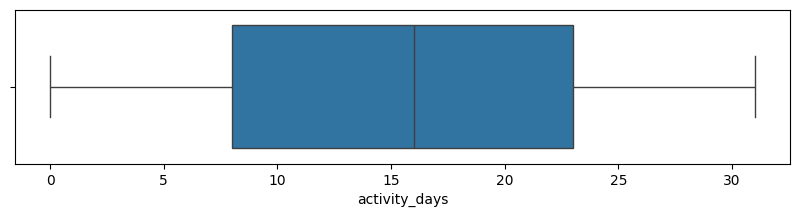

In [35]:
# Box plot
waze_1km_drive = waze_raw[ waze_raw["driven_km_drives"] >= 1 ]

plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_1km_drive,
    x = "activity_days"
)

<Axes: xlabel='driving_days'>

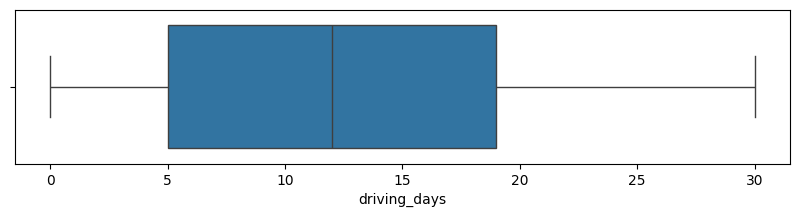

In [36]:
plt.figure(figsize = (10,2))

sns.boxplot(
    data = waze_raw,
    x = "driving_days"
)

<Axes: xlabel='driving_days', ylabel='Count'>

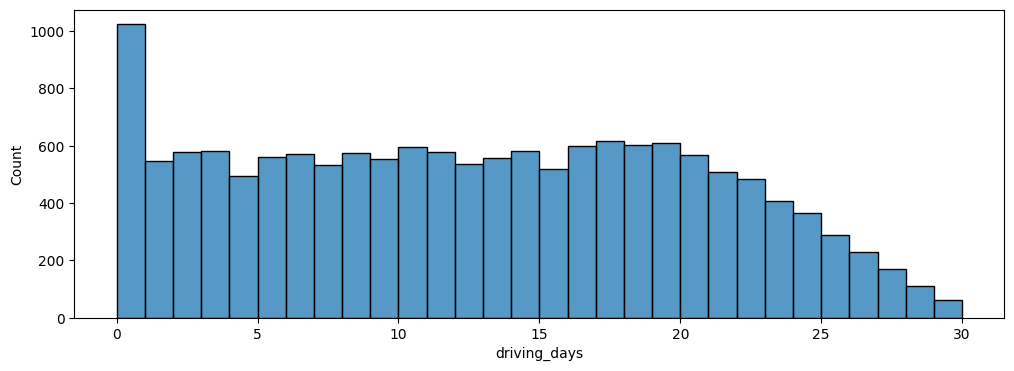

In [37]:
# Histogram
driving_days_mean = waze_raw["driving_days"].mean()

plt.figure(figsize = (12,4))

sns.histplot(
    data = waze_raw,
    x = "driving_days",
    bins = range(0,31,1)
)


([<matplotlib.patches.Wedge at 0x2318fac4c80>,
 [Text(-0.4834458518127324, 0.9880688783506247, 'iPhone:9672'),
  Text(0.4834457026184771, -0.9880689513489063, 'Android:5327')],
 [Text(-0.2636977373523995, 0.5389466609185225, '64.5%'),
  Text(0.26369765597371475, -0.538946700735767, '35.5%')])

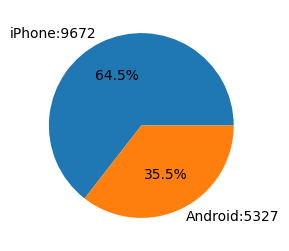

In [38]:
# Pie chart
device_count = waze_raw["device"].value_counts()

plt.figure(figsize = (3,3))

plt.pie(
    device_count,
    labels = [f"{device_count.index[0]}:{device_count.values[0]}",
             f"{device_count.index[1]}:{device_count.values[1]}"],
    autopct ="%1.1f%%"
)

([<matplotlib.patches.Wedge at 0x2318fe11160>,
 [Text(-0.9336262721092713, 0.5816717149968229, 'retained:11763'),
  Text(0.9336261842792751, -0.5816718559704612, 'churned:2536')],
 [Text(-0.5092506938777843, 0.3172754809073579, '82.3%'),
  Text(0.5092506459705136, -0.31727555780206973, '17.7%')])

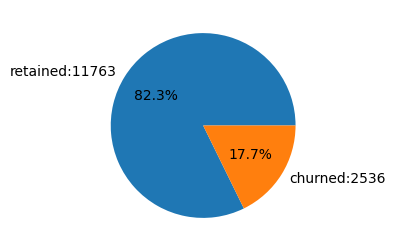

In [39]:
# Pie chart
label_count = waze_raw["label"].value_counts()

plt.figure(figsize = (3,3))

plt.pie(
    label_count,
    labels = [f"{label_count.index[0]}:{label_count.values[0]}",f"{label_count.index[1]}:{label_count.values[1]}"],
    autopct ="%1.1f%%"
)

<Axes: xlabel='label', ylabel='ID'>

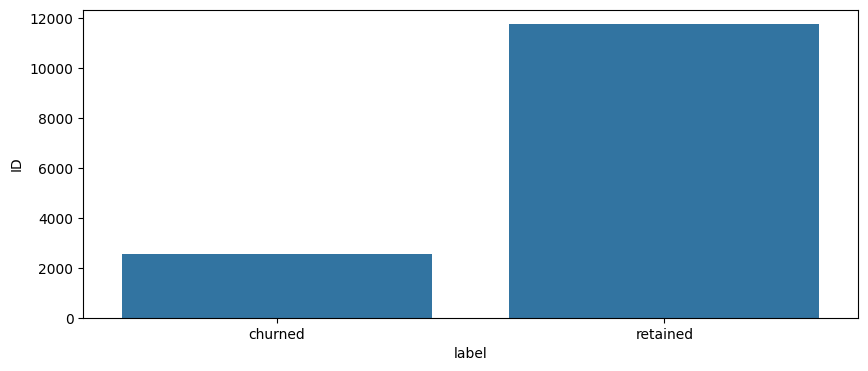

In [40]:
label_count = waze_raw.groupby(["label"],as_index = False)["ID"].count()

plt.figure(figsize = (10,4))

sns.barplot(
    data = label_count,
    x = "label",
    y = "ID"
)

<Axes: xlabel='label', ylabel='ID'>

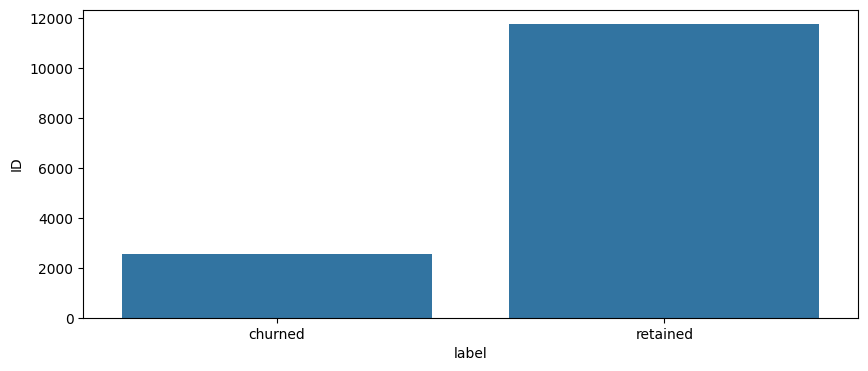

In [41]:
label_count = waze_raw.groupby(["label"],as_index = False)["ID"].count()

plt.figure(figsize = (10,4))

sns.barplot(
    data = label_count,
    x = "label",
    y = "ID"
)

### driving_days vs. activity_days

Text(0, 0.5, 'Count')

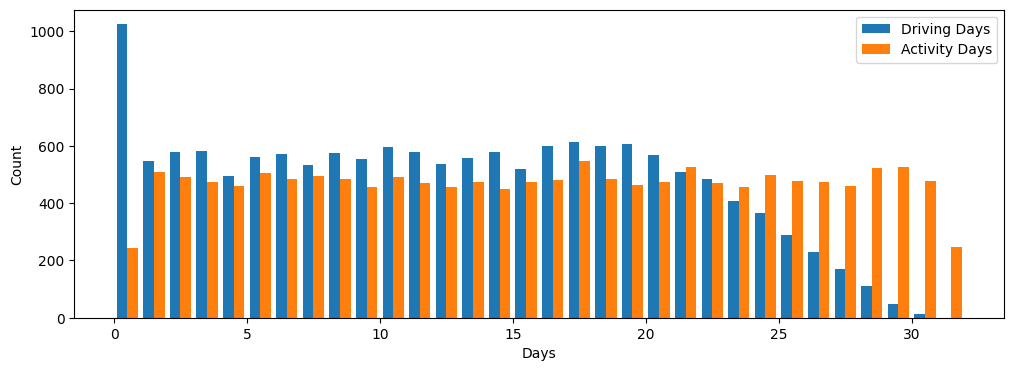

In [42]:
# Histogram

plt.figure(figsize = (12,4))

label = ["Driving Days","Activity Days"]

plt.hist(
    [waze_raw["driving_days"],waze_raw["activity_days"]],
    bins = range(0,33),
    label = label
)

plt.legend()
plt.xlabel("Days")
plt.ylabel("Count")

In [43]:
max_driving_days = waze_raw["driving_days"].max()
max_activity_days = waze_raw["activity_days"].max()

print(max_driving_days)
print(max_activity_days)

30
31


<Axes: xlabel='activity_days', ylabel='driving_days'>

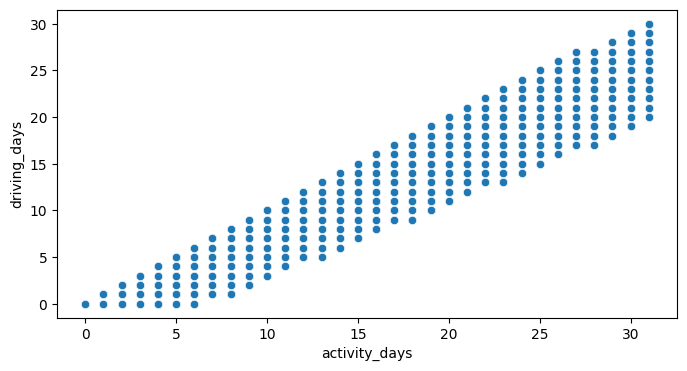

In [44]:
# Scatter plot

plt.figure(figsize = (8,4))

sns.scatterplot(
    data = waze_raw,
    x = "activity_days",
    y = "driving_days"
)

### Retention by device

Text(0, 0.5, "Count of ID's")

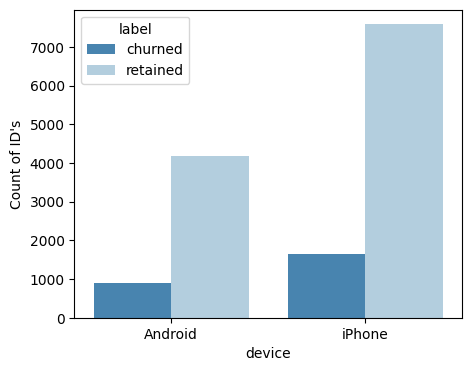

In [45]:
# Histogram

label_by_device = waze_raw.groupby(["label","device"], as_index = False)["ID"].count()
#label_by_device
plt.figure(figsize = (5,4))

sns.barplot(
    data = label_by_device,
    x = "device",
    y = "ID",
    hue = "label",
    palette = "Blues_r"
)

plt.ylabel("Count of ID's")

In [46]:
# 1. Create `km_per_driving_day` column
waze_raw["km_per_driving_day"] = round(waze_raw["driven_km_drives"] / waze_raw["driving_days"],2)
#waze_raw.head(10)

# 2. Call `describe()` on the new column

waze_raw.describe().round(2)
print(waze_raw["km_per_driving_day"].max())

inf


C:\Users\EQUIPO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [47]:
# 1. Convert infinite values to zero
waze_raw.loc[waze_raw["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

# 2. Confirm that it worked
waze_raw.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18,578.96
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82,1030.09
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00,136.24
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00,272.89
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00,558.69
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00,15420.23


Text(250, 900, 'KM per day driven median: 237.34')

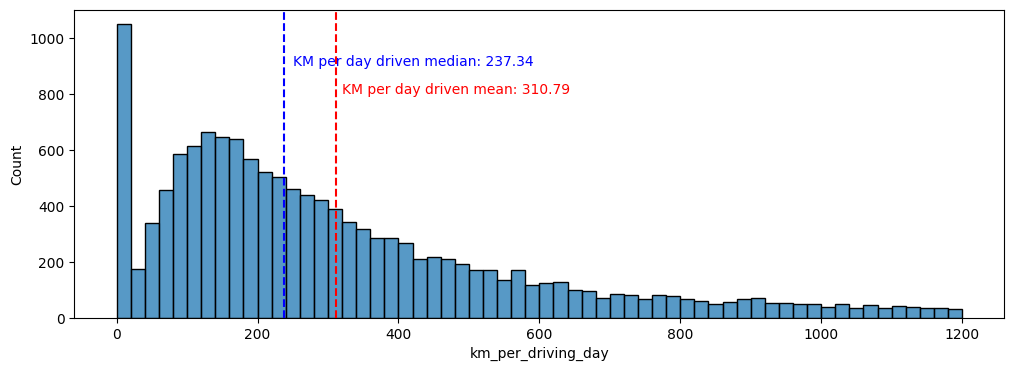

In [48]:
# Histogram

waze_drives_less_1200km_per_day = waze_raw[ waze_raw["km_per_driving_day"] < 1200]

km_per_day_mean = waze_drives_less_1200km_per_day["km_per_driving_day"].mean()
km_per_day_median = waze_drives_less_1200km_per_day["km_per_driving_day"].median()

plt.figure( figsize = (12,4))

sns.histplot(
    data = waze_drives_less_1200km_per_day,
    x = "km_per_driving_day",
    bins = range(0,1201,20)
)

plt.axvline(km_per_day_mean, color="red", linestyle = "--")
plt.axvline(km_per_day_median, color="blue", linestyle = "--")


plt.text(320,800,f"KM per day driven mean: {km_per_day_mean:.2f}",color ="red")
plt.text(250,900,f"KM per day driven median: {km_per_day_median:.2f}",color ="blue")

### Churn rate per number of driving days

In [49]:
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.36
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.90
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.39
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.53
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.46


In [50]:
waze_churn_drives = waze_raw[(waze_raw["label"] == "churned") & (waze_raw["km_per_driving_day"] < 1200)]
waze_churn_drives.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00,1981.00
mean,7511.97,86.88,72.41,196.95,1455.57,141.70,31.54,3719.41,1775.99,11.18,8.55,352.46
std,4391.49,86.46,70.49,139.76,976.82,166.26,47.75,2222.70,1292.70,7.95,6.78,314.13
min,14.00,0.00,0.00,1.36,6.00,0.00,0.00,178.23,23.22,0.00,0.00,0.00
25%,3671.00,26.00,23.00,93.10,623.00,16.00,0.00,2090.85,851.25,5.00,3.00,94.77
50%,7425.00,59.00,50.00,164.36,1301.00,85.00,11.00,3257.18,1444.19,10.00,8.00,283.56
75%,11343.00,120.00,100.00,266.10,2220.00,204.00,46.00,4866.16,2385.41,17.00,13.00,542.47
max,14997.00,627.00,506.00,1216.15,3496.00,1170.00,394.00,15849.44,9848.21,31.00,29.00,1198.94


Text(8, 300, 'Churned days driven median: 8.00')

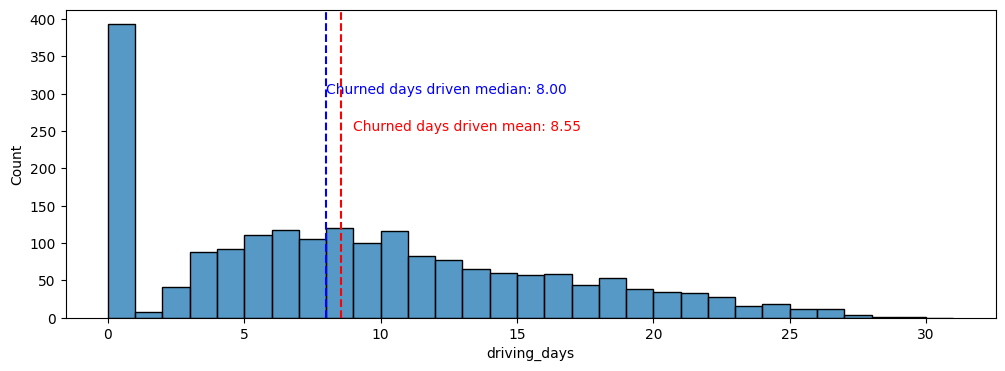

In [51]:
# Histogram

churn_driving_mean = waze_churn_drives["driving_days"].mean()
churn_driving_median = waze_churn_drives["driving_days"].median()

plt.figure( figsize = (12,4))

sns.histplot(
    data = waze_churn_drives,
    x = "driving_days",
    bins = range(0,32)
)

plt.axvline(churn_driving_mean, color="red", linestyle = "--")
plt.axvline(churn_driving_median, color="blue", linestyle = "--")

plt.text(9,250,f"Churned days driven mean: {churn_driving_mean:.2f}",color ="red")
plt.text(8,300,f"Churned days driven median: {churn_driving_median:.2f}",color ="blue")

Text(290, 300, 'Churned KM per day driven median: 283.56')

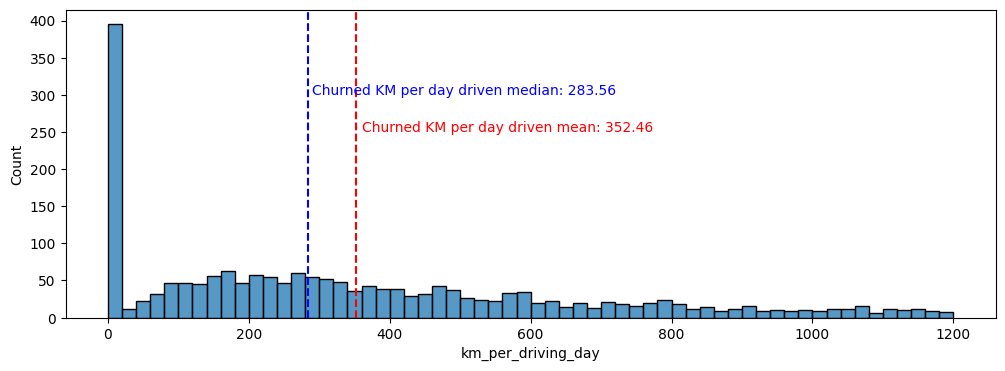

In [52]:
# Histogram

churn_km_drives_mean = waze_churn_drives["km_per_driving_day"].mean()
churn_km_drives_median = waze_churn_drives["km_per_driving_day"].median()

plt.figure( figsize = (12,4))

sns.histplot(
    data = waze_churn_drives,
    x = "km_per_driving_day",
    bins = range(0,1201,20)
)

plt.axvline(churn_km_drives_mean, color="red", linestyle = "--")
plt.axvline(churn_km_drives_median, color="blue", linestyle = "--")

plt.text(360,250,f"Churned KM per day driven mean: {churn_km_drives_mean:.2f}",color ="red")
plt.text(290,300,f"Churned KM per day driven median: {churn_km_drives_median:.2f}",color ="blue")

<Axes: xlabel='driving_days', ylabel='Count'>

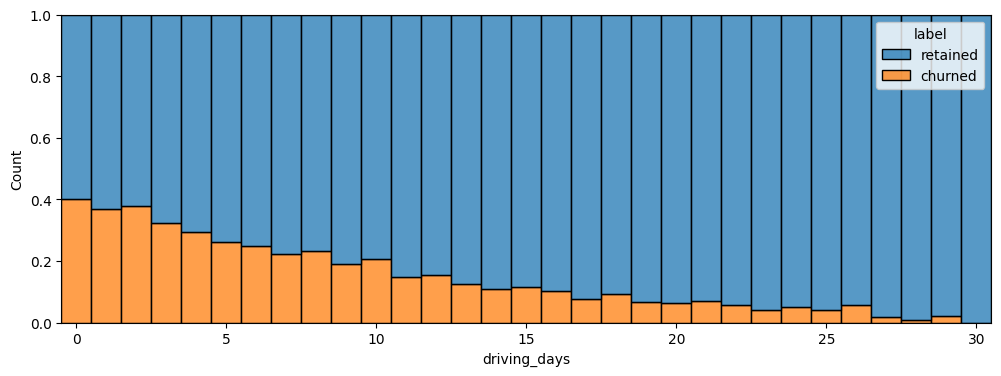

In [53]:
plt.figure(figsize = (12,4))

sns.histplot(
    data = waze_raw,
    x = "driving_days",
    bins = range(1,32),
    hue = "label",
    multiple = "fill",
    discrete = True
)

### Proportion of sessions that occurred in the last month

In [54]:
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.36
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.90
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.39
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.53
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.46


In [55]:
waze_raw["percent_sessions_in_last_month"] = round(waze_raw["sessions"] / waze_raw["total_sessions"],3)
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.36,0.954
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.90,0.407
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.39,0.841
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.53,0.725
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.46,0.499


In [56]:
waze_raw.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18,578.96,0.45
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82,1030.09,0.29
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00,136.24,0.20
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00,272.89,0.42
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00,558.69,0.69
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00,15420.23,1.53


In [57]:
perc_sess_lastMonth = waze_raw["percent_sessions_in_last_month"].mean()
print(perc_sess_lastMonth)

0.44925675045003


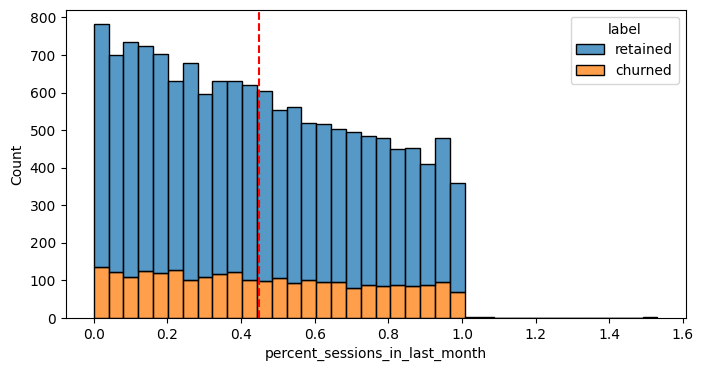

In [58]:
# Histogram

plt.figure( figsize = (8,4))

sns.histplot(
    data = waze_raw,
    x = "percent_sessions_in_last_month",
    hue = "label",
    multiple = "stack"
)

plt.axvline(perc_sess_lastMonth,color = "red", linestyle="--")

In [59]:
median_days_after_onb = waze_raw["n_days_after_onboarding"].median()
print(median_days_after_onb/360)

4.836111111111111


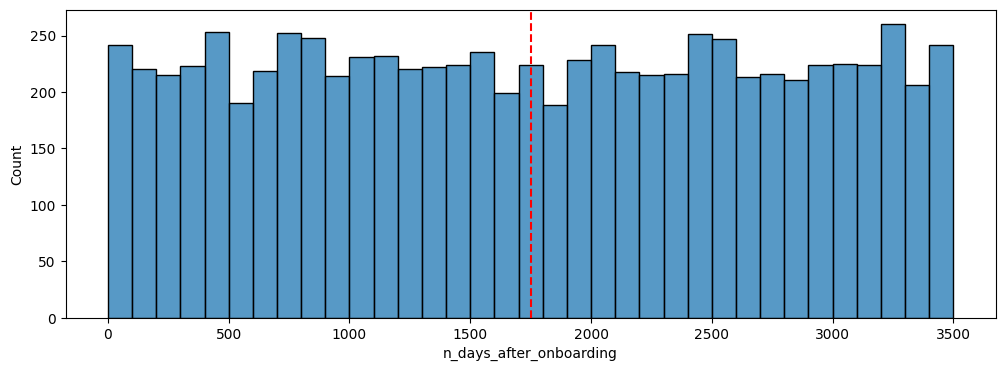

In [60]:
# Histogram
waze_40_sessions = waze_raw[ waze_raw["percent_sessions_in_last_month"] >= 0.4]
waze_40_sessions_mean = waze_40_sessions["n_days_after_onboarding"].mean()

plt.figure(figsize = (12,4))

sns.histplot(
    data = waze_40_sessions,
    x = "n_days_after_onboarding",
    bins = range(0,3501,100)
)

plt.axvline(waze_40_sessions_mean, color="red",linestyle = "--")

## Task 3b. Handling outliers

In [61]:
def outlier_check(column_name, percentile):
    threshold = waze_raw[column_name].quantile(percentile)
    waze_raw.loc[waze_raw[column_name] > threshold, column_name] = threshold
    
    print(f"{column_name:>25} | Percentile: {percentile} | Threshold: {threshold:.2f}")

In [62]:
column_check = ["sessions","drives","total_sessions","driven_km_drives","duration_minutes_drives"]

for column in column_check:
    print(f"... checking column: {column}")
    outlier_check(column,0.80)

... checking column: sessions
                 sessions | Percentile: 0.8 | Threshold: 129.00
... checking column: drives
                   drives | Percentile: 0.8 | Threshold: 107.00
... checking column: total_sessions
           total_sessions | Percentile: 0.8 | Threshold: 283.95
... checking column: driven_km_drives
         driven_km_drives | Percentile: 0.8 | Threshold: 5850.23
... checking column: duration_minutes_drives
  duration_minutes_drives | Percentile: 0.8 | Threshold: 2771.99


In [63]:
waze_raw.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,64.39,54.07,165.45,1749.84,121.61,29.67,3607.26,1581.76,15.54,12.18,578.96,0.45
std,4329.98,45.04,37.08,86.83,1008.51,148.12,45.39,1655.89,857.96,9.00,7.82,1030.09,0.29
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00,136.24,0.20
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00,272.89,0.42
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00,558.69,0.69
max,14998.00,129.00,107.00,283.95,3500.00,1236.00,415.00,5850.23,2771.99,31.00,30.00,15420.23,1.53
